In [3]:
import mlflow
import mlflow.sklearn
import pandas as pd
import joblib
import gc
import time
import os
from typing import Dict, Any
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

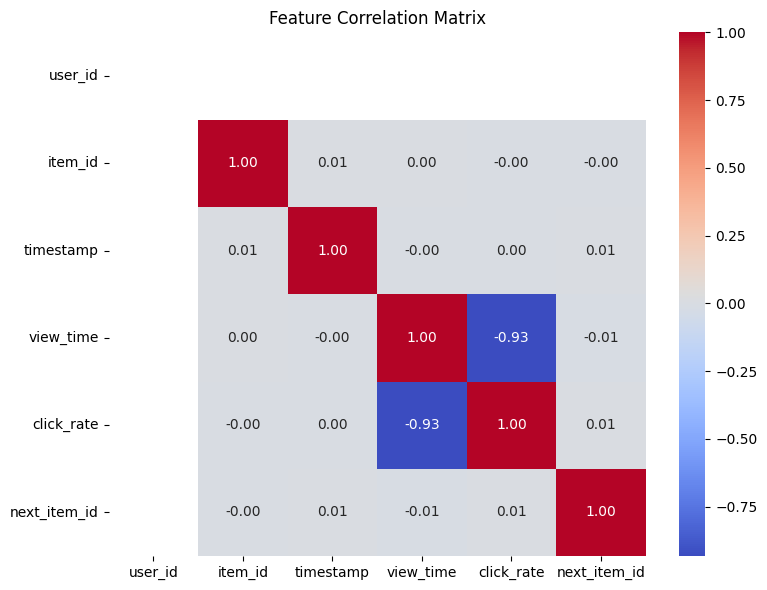

In [8]:
def analyze_correlation_matrix(file_path: str):
    """
    Load a CSV file and generate a correlation matrix visualization.
    
    Args:
        file_path: Path to the CSV file to analyze
    """
    try:
        # Load the data
        df = pd.read_csv(file_path)
        
        # Calculate and visualize correlation matrix
        plt.figure(figsize=(8, 6))
        corr_matrix = df.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")

# Run correlation matrix analysis on the sample data
sample_data_path = "../data/samples/user_0_processed.csv"  # Updated path with correct location
analyze_correlation_matrix(sample_data_path)


/var/folders/8t/3s81913d2jj23p369dzymznm0000gn/T/ipykernel_11926/3232742140.py:7: PerformanceWarning: The following operation may generate 2551310610 cells in the resulting pandas object.
  transition_matrix = pd.crosstab(df['item_id'], df['next_item_id'])


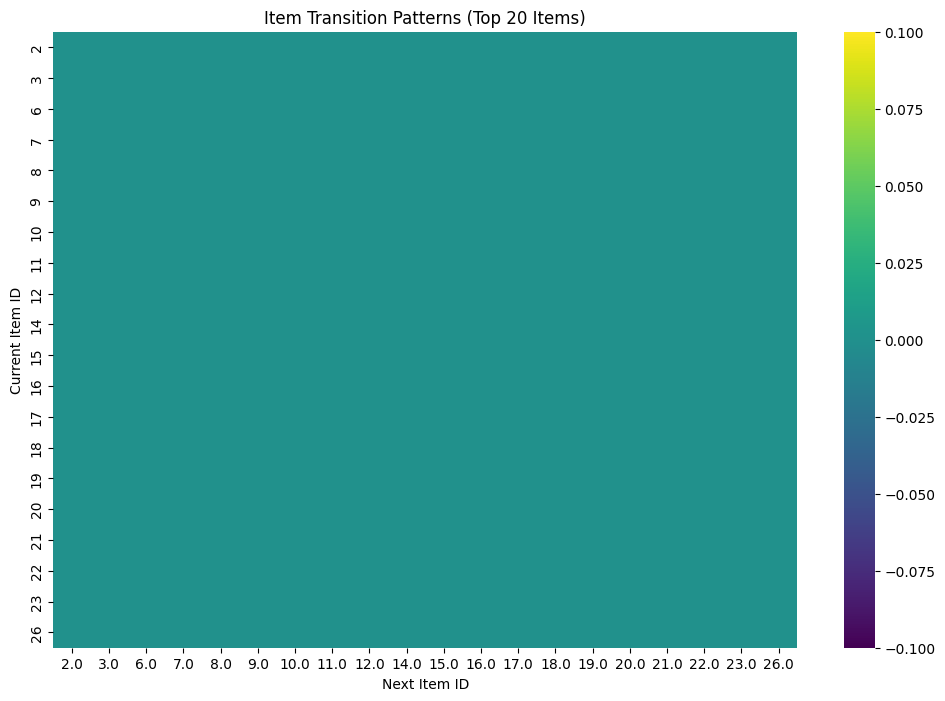

In [4]:
# Data loading
data_path = "../data/samples/user_0_processed.csv"
df = pd.read_csv(data_path)

# Visualize item transitions
plt.figure(figsize=(12, 8))
transition_matrix = pd.crosstab(df['item_id'], df['next_item_id'])
sns.heatmap(transition_matrix.iloc[:20, :20], cmap='viridis', annot=False)
plt.title('Item Transition Patterns (Top 20 Items)')
plt.xlabel('Next Item ID')
plt.ylabel('Current Item ID')
plt.show()


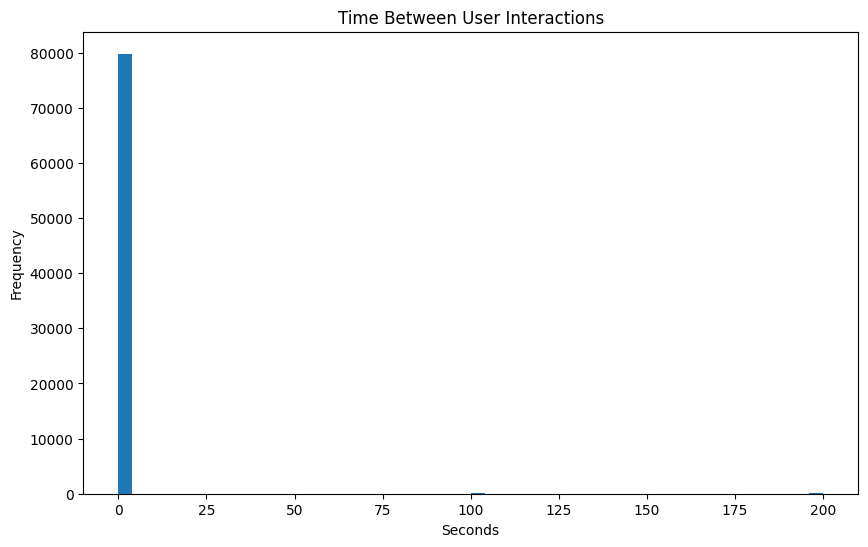

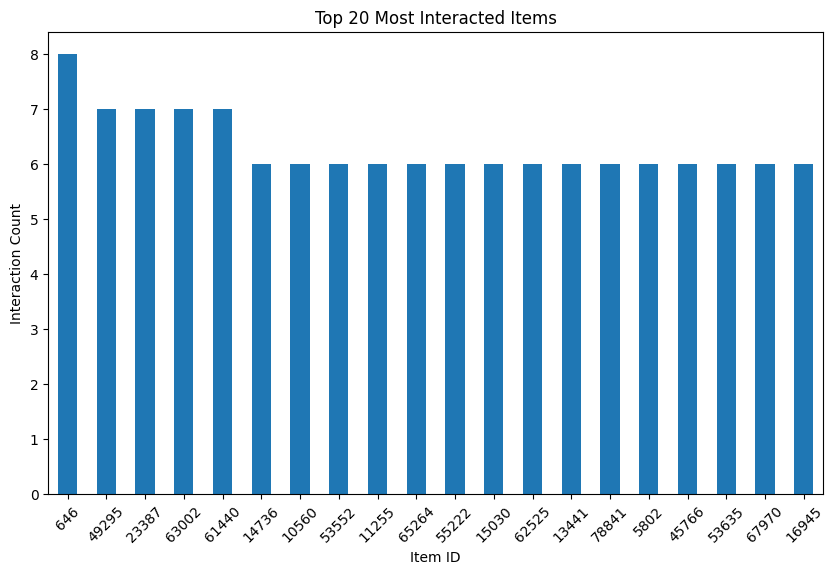

In [5]:
# Visualize time between interactions
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['time_diff'] = df['timestamp'].diff().dt.total_seconds()
plt.figure(figsize=(10, 6))
plt.hist(df['time_diff'].dropna(), bins=50)
plt.title('Time Between User Interactions')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

# Visualize item popularity
plt.figure(figsize=(10, 6))
item_counts = df['item_id'].value_counts()[:20]
item_counts.plot(kind='bar')
plt.title('Top 20 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Interaction Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
# simple_data_comments.py

import pandas as pd
import os
import time
from datetime import datetime

# Determine project root directory (assuming src is one level below root)
script_dir = os.path.dirname(os.path.abspath(__file__))
project_root = os.path.dirname(script_dir)
default_data_path = os.path.join(project_root, 'data', 'user_item_interactions.csv')

def analyze_dataset(data_path=default_data_path):
    """
    Analyze the processed dataset and print statistics about unique values.
    
    Args:
        data_path (str): Path to the CSV file containing user-item interaction data. 
                       Defaults to 'data/user_item_interactions.csv' relative to project root.
    """
    start_time = time.time()
    
    print(f"Analyzing dataset: {os.path.relpath(data_path, project_root)}")
    print("="*50)
    
    try:
        # Check if the provided path is absolute, if not, assume it's relative to project root
        if not os.path.isabs(data_path):
            data_path = os.path.join(project_root, data_path)
            
        # Check if file exists (using absolute path)
        if not os.path.exists(data_path):
            # Look for available CSVs in the project's data directory
            project_data_dir = os.path.join(project_root, 'data')
            available_files = [f for f in os.listdir(project_data_dir) if f.endswith('.csv')] if os.path.exists(project_data_dir) else []
            error_msg = f"Data file not found: {data_path}"
            if available_files:
                error_msg += f"\nAvailable CSV files in {project_data_dir}: {', '.join(available_files)}"
            raise FileNotFoundError(error_msg)
        
        # Load data with optimized dtypes
        dtypes = {
            'user_id': 'int32',
            'item_id': 'int32',
            'view_time': 'float32',
            'click_rate': 'float32'
        }
        
        # Parse dates for timestamp column instead of trying to convert to float
        df = pd.read_csv(data_path, dtype=dtypes, parse_dates=['timestamp'])
        
        # Calculate and print statistics
        total_records = len(df)
        unique_users = df['user_id'].nunique()
        unique_items = df['item_id'].nunique()
        
        # Time range (using datetime objects directly)
        min_timestamp = df['timestamp'].min()
        max_timestamp = df['timestamp'].max()
        time_span_days = (max_timestamp - min_timestamp).total_seconds() / (24 * 3600)
        
        # Value ranges
        view_time_range = (df['view_time'].min(), df['view_time'].max())
        click_rate_range = (df['click_rate'].min(), df['click_rate'].max())
        
        # Print results
        print(f"Total records: {total_records:,}")
        print(f"Unique users: {unique_users:,}")
        print(f"Unique items: {unique_items:,}")
        print(f"Avg interactions per user: {total_records/unique_users:.2f}")
        print(f"Avg interactions per item: {total_records/unique_items:.2f}")
        print(f"Time range: {min_timestamp} to {max_timestamp}")
        print(f"Time span: {time_span_days:.2f} days")
        print(f"View time range: {view_time_range[0]:.2f} to {view_time_range[1]:.2f}")
        print(f"Click rate range: {click_rate_range[0]:.2f} to {click_rate_range[1]:.2f}")
        
        print(f"\nAnalysis completed in {time.time() - start_time:.2f} seconds")
        
    except Exception as e:
        print(f"Error analyzing dataset: {str(e)}")

if __name__ == "__main__":
    analyze_dataset()


NameError: name '__file__' is not defined